Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')
Confusion Matrix:
[[62  2]
 [10 26]]
Accuracy: 0.8800
Precision: 0.9286
Recall: 0.7222


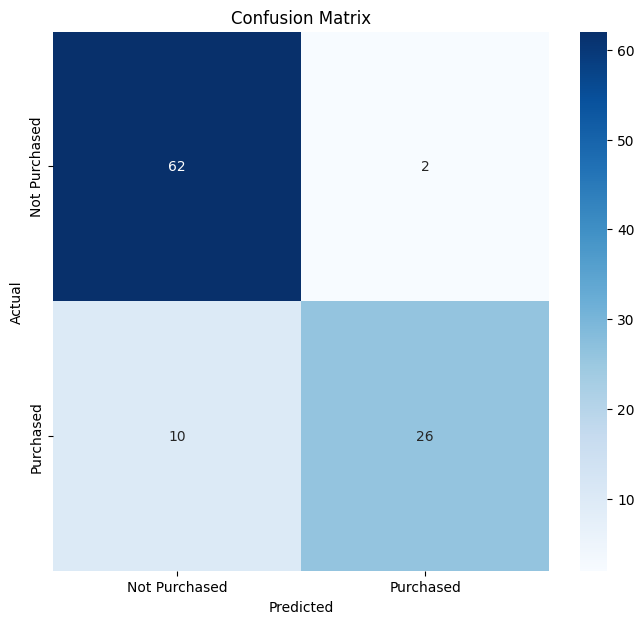

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset
url = 'https://raw.githubusercontent.com/AaminaRuvaida/Social-Network-Ads-Prediction-using-Logistic-Regression/main/Social_Network_Ads.csv'
data = pd.read_csv(url)

# Drop 'User ID' column - it's not useful for prediction
if 'User ID' in data.columns:
  data = data.drop(columns=['User ID'])


print(data.columns)

data = data.drop(columns=['User ID'],errors='ignore')

# Convert 'Gender' column to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)  # 'Gender_Male' will be created

# Define features and target
X = data.drop('Purchased', axis=1)
y = data['Purchased']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=46, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print results
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Confusion matrix heatmap
plt.figure(figsize=(8,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Purchased', 'Purchased'],
            yticklabels=['Not Purchased', 'Purchased'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
